In [ ]:
!pip install -r requirements

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

In [2]:
path = "../data/happiness.csv"
df = pd.read_csv(path)

display(df)

,Countries,"Happiness index, 2022",Global rank,Available data
0,Finland,7.80,1,2013 - 2022
1,Denmark,7.59,2,2013 - 2022
2,Iceland,7.53,3,2013 - 2022
3,Israel,7.47,4,2013 - 2022
4,Netherlands,7.40,5,2013 - 2022
...,...,...,...,...
129,DR Congo,3.21,130,2017 - 2022
130,Zimbabwe,3.20,131,2013 - 2022
131,Sierra Leone,3.14,132,2013 - 2022
132,Lebanon,2.39,133,2013 - 2022


0 - Manipulação e Tratamento de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Countries              134 non-null    object 
 1   Happiness index, 2022  134 non-null    float64
 2   Global rank            134 non-null    int64  
 3   Available data         134 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [32]:
# Renomeando as colunas:
df = df.rename(columns={"Countries": "country", "Happiness index, 2022": "happiness", "Global rank": "ranking", "Available data": "date_of_data"})

# Garantindo a ordem do ranking de felicidade dos países:
df = df.sort_values(by="happiness", ascending=False)
display(df)

,country,happiness,ranking,date_of_data
0,Finland,7.80,1,2013 - 2022
1,Denmark,7.59,2,2013 - 2022
2,Iceland,7.53,3,2013 - 2022
3,Israel,7.47,4,2013 - 2022
4,Netherlands,7.40,5,2013 - 2022
...,...,...,...,...
129,DR Congo,3.21,130,2017 - 2022
130,Zimbabwe,3.20,131,2013 - 2022
131,Sierra Leone,3.14,132,2013 - 2022
132,Lebanon,2.39,133,2013 - 2022


In [10]:
# Trocando colunas com object para String:
df["country"] = df["country"].astype(str)
type(df.country[0])

str

In [12]:
# Verifica se existem dados nulos (NaN):
if df.isnull().values.any():
    print("Existem dados nulos no conjunto de dados")
else:
    print("Não existem dados nulos no conjunto de dados")

sum_of_nulls = df.isnull().sum()
print("\nTotal de dados nulos por atributo:")
print(sum_of_nulls)

Não existem dados nulos no conjunto de dados

Total de dados nulos por atributo:
country         0
happiness       0
ranking         0
date_of_data    0
dtype: int64


In [33]:
# Verificando quais períodos de data disponível:
df["date_of_data"].unique()

array(['2013 - 2022', '2017 - 2022', '2016 - 2022', '2015 - 2022',
       '2019 - 2022'], dtype=object)

1 - Estística Descritiva

In [ ]:
# Média, moda e mediana do Índice de felicidade de 2022 (Happiness Index, 2022:
mean = df["Happiness index, 2022"].mean()
median = df["Happiness index, 2022"].median()
mode = max(set(list(df["Happiness index, 2022"].values)), key=list(df["Happiness index, 2022"].values).count)

print("A média do índice de felicidade é: %.2f" % mean)
print("A mediana do índice de felicidade é: %.2f" % median)
print("A moda do índice de felicidade é: %.2f" % mode)

<Axes: title={'center': 'Happiness Distribution'}>

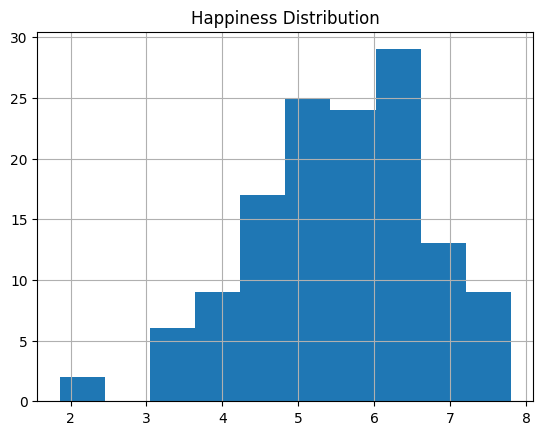

In [19]:
# Distribuição do Índice de Felicidade:
plt.title("Happiness Distribution")
df["happiness"].hist()

In [27]:
group = df.groupby(["country"])["happiness"].unique()
display(group)

country
Afghanistan    [1.86]
Albania        [5.28]
Algeria        [5.33]
Argentina      [6.02]
Armenia        [5.34]
                ...  
Uzbekistan     [6.01]
Venezuela      [5.21]
Vietnam        [5.76]
Zambia         [3.98]
Zimbabwe        [3.2]
Name: happiness, Length: 134, dtype: object